In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("tcs.CSV")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4494 non-null   datetime64[ns]
 1   Open       4486 non-null   float64       
 2   High       4486 non-null   float64       
 3   Low        4486 non-null   float64       
 4   Close      4486 non-null   float64       
 5   Adj Close  4486 non-null   float64       
 6   Volume     4486 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 245.9 KB


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0
4493,2022-10-24,3170.100098,3178.000000,3155.000000,3161.699951,3161.699951,260949.0


In [6]:
df.isnull().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df1=df.reset_index()['Close']
df1

0        120.332497
1        123.345001
2        123.512497
3        123.487503
4        124.207497
           ...     
4481    3144.699951
4482    3121.850098
4483    3157.300049
4484    3137.399902
4485    3161.699951
Name: Close, Length: 4486, dtype: float64

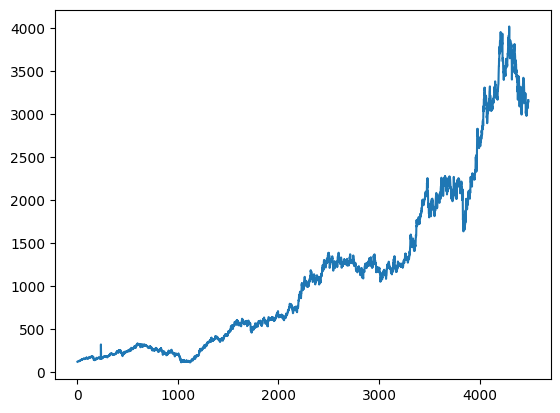

In [10]:
plt.plot(df1)
plt.show()

In [11]:
np.array(df1).reshape(-1,1)

array([[ 120.332497],
       [ 123.345001],
       [ 123.512497],
       ...,
       [3157.300049],
       [3137.399902],
       [3161.699951]])

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.00224754],
       [0.00301848],
       [0.00306134],
       ...,
       [0.77944266],
       [0.77434998],
       [0.78056864]])

In [14]:
# splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(3364, 1122)

In [16]:
train_data

array([[0.00224754],
       [0.00301848],
       [0.00306134],
       ...,
       [0.34896101],
       [0.34558296],
       [0.34733598]])

In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 200
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
X_train

array([[0.00224754, 0.00301848, 0.00306134, ..., 0.01232406, 0.01278598,
        0.01231255],
       [0.00301848, 0.00306134, 0.00305494, ..., 0.01278598, 0.01231255,
        0.01195619],
       [0.00306134, 0.00305494, 0.0032392 , ..., 0.01231255, 0.01195619,
        0.01213213],
       ...,
       [0.28752943, 0.27998004, 0.27850855, ..., 0.34375959, 0.34396433,
        0.34391954],
       [0.27998004, 0.27850855, 0.28260313, ..., 0.34396433, 0.34391954,
        0.34993986],
       [0.27850855, 0.28260313, 0.28430495, ..., 0.34391954, 0.34993986,
        0.34896101]])

In [20]:
y_train

array([0.01195619, 0.01213213, 0.01195299, ..., 0.34993986, 0.34896101,
       0.34558296])

In [21]:
print(X_train.shape), print(y_train.shape)

(3163, 200)
(3163,)


(None, None)

In [22]:
print(X_test.shape), print(y_test.shape)

(921, 200)
(921,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
print(X_train.shape), print(y_train.shape)

(3163, 200, 1)
(3163,)


(None, None)

In [25]:
print(X_test.shape), print(y_test.shape)

(921, 200, 1)
(921,)


(None, None)

In [26]:
X_train[0].shape

(200, 1)

In [27]:
### Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 200, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
50/50 [==============================] - 22s 319ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 2/100
50/50 [==============================] - 15s 295ms/step - loss: 9.1408e-05 - val_loss: 0.0019
Epoch 3/100
50/50 [==============================] - 14s 283ms/step - loss: 8.2434e-05 - val_loss: 0.0041
Epoch 4/100
50/50 [==============================] - 15s 291ms/step - loss: 7.6654e-05 - val_loss: 0.0043
Epoch 5/100
50/50 [==============================] - 15s 294ms/step - loss: 8.0629e-05 - val_loss: 0.0068
Epoch 6/100
50/50 [==============================] - 14s 285ms/step - loss: 7.5243e-05 - val_loss: 0.0065
Epoch 7/100
50/50 [==============================] - 14s 290ms/step - loss: 7.4377e-05 - val_loss: 0.0061
Epoch 8/100
50/50 [==============================] - 14s 283ms/step - loss: 7.1029e-05 - val_loss: 0.0049
Epoch 9/100
50/50 [==============================] - 14s 288ms/step - loss: 7.8781e-05 - val_loss: 0.0055
Epoch 10/100
50/50 [==============================

In [31]:
# prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

29/29 [==============================] - 2s 66ms/step


In [32]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,train_predict))

795.1703752802537

In [34]:
# Test Data RMSE
np.sqrt(mean_squared_error(y_test,test_predict))

2670.663069655658

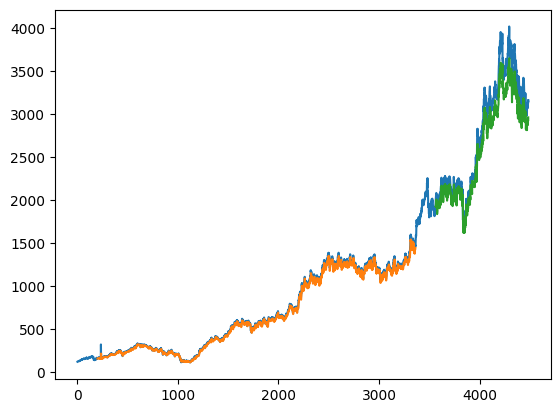

In [35]:
# Plotting 
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
first_temp = len(test_data) - time_step
first_temp

922

In [37]:
x_input=test_data[first_temp:].reshape(1,-1)
x_input.shape

(1, 200)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input[0]

0.9656055109341172

In [40]:
len(temp_input)

200

In [41]:
x_input.shape

(1, 200)

In [42]:
x_input.reshape(1,-1).reshape((1, time_step, 1))

array([[[0.96560551],
        [0.9595148 ],
        [0.94582353],
        [0.95760827],
        [0.96435157],
        [0.97357713],
        [0.95924608],
        [0.96897072],
        [0.98694851],
        [1.        ],
        [0.99269378],
        [0.97325724],
        [0.95071147],
        [0.95249004],
        [0.93658516],
        [0.93621404],
        [0.90533834],
        [0.91577954],
        [0.92760264],
        [0.94408332],
        [0.95829922],
        [0.95021246],
        [0.94773006],
        [0.93854286],
        [0.92944519],
        [0.93382131],
        [0.93632925],
        [0.91703348],
        [0.92696286],
        [0.94847224],
        [0.94726947],
        [0.93987359],
        [0.94235592],
        [0.92329051],
        [0.88925427],
        [0.88347071],
        [0.84197461],
        [0.8724537 ],
        [0.88101393],
        [0.87895383],
        [0.87850599],
        [0.87337501],
        [0.86327925],
        [0.89272189],
        [0.90107744],
        [0

In [43]:
x_input.shape

(1, 200)

In [44]:
time_step

200

In [45]:
# demonstrate prediction for next 30 days
lst_output=[]
n_steps=time_step
i=0
while(i<30):
    
    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print("\n\nFinally Printing 30 Day Prediction")
print(lst_output)

[0.7297545]
201
1 day input [0.9595148  0.94582353 0.95760827 0.96435157 0.97357713 0.95924608
 0.96897072 0.98694851 1.         0.99269378 0.97325724 0.95071147
 0.95249004 0.93658516 0.93621404 0.90533834 0.91577954 0.92760264
 0.94408332 0.95829922 0.95021246 0.94773006 0.93854286 0.92944519
 0.93382131 0.93632925 0.91703348 0.92696286 0.94847224 0.94726947
 0.93987359 0.94235592 0.92329051 0.88925427 0.88347071 0.84197461
 0.8724537  0.88101393 0.87895383 0.87850599 0.87337501 0.86327925
 0.89272189 0.90107744 0.89809603 0.89251714 0.90373889 0.89117361
 0.90704012 0.91135226 0.89956752 0.91856895 0.92149913 0.93108307
 0.92023238 0.92029636 0.919695   0.92639987 0.9285495  0.93336065
 0.93632925 0.94770451 0.93249058 0.91426963 0.91465349 0.91740454
 0.91604826 0.9085884  0.87432187 0.8599524  0.88167933 0.90006653
 0.8959464  0.87947846 0.87899225 0.88280531 0.88871689 0.87909459
 0.87799416 0.86196133 0.87057273 0.84989512 0.85309402 0.85146895
 0.84462332 0.84376599 0.84536544 

In [52]:
lst_output[0]

[0.7297545075416565]

In [46]:
day_new=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+31)

In [54]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [53]:
day_pred

array([201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230])

In [81]:
scaler.inverse_transform(lst_output)

array([[2963.13864296],
       [2742.35056202],
       [2562.03358031],
       [2427.96202992],
       [2341.24433481],
       [2281.81636791],
       [2232.96908665],
       [2185.07324724],
       [2135.39191131],
       [2085.39917324],
       [2038.12031534],
       [1996.29472158],
       [1961.5144558 ],
       [1934.10850494],
       [1913.43647991],
       [1898.3076227 ],
       [1887.35241602],
       [1879.2754083 ],
       [1872.97819079],
       [1867.59677973],
       [1862.47681139],
       [1857.12963827],
       [1851.18260259],
       [1844.34805916],
       [1836.39845382],
       [1827.16317918],
       [1816.5236835 ],
       [1804.4175466 ],
       [1790.83801405],
       [1775.8321339 ]])

In [83]:
scaler.inverse_transform(lst_output).reshape(30,)

array([2963.13864296, 2742.35056202, 2562.03358031, 2427.96202992,
       2341.24433481, 2281.81636791, 2232.96908665, 2185.07324724,
       2135.39191131, 2085.39917324, 2038.12031534, 1996.29472158,
       1961.5144558 , 1934.10850494, 1913.43647991, 1898.3076227 ,
       1887.35241602, 1879.2754083 , 1872.97819079, 1867.59677973,
       1862.47681139, 1857.12963827, 1851.18260259, 1844.34805916,
       1836.39845382, 1827.16317918, 1816.5236835 , 1804.4175466 ,
       1790.83801405, 1775.8321339 ])

In [ ]:
# 2022-10-24 ###last entry

In [63]:
import datetime
today = datetime.date(2022,10,25)
formatted_date = today.strftime('%Y-%m-%d')
formatted_date

'2022-10-25'

In [65]:
one_day = datetime.timedelta(days=1)
one_day

datetime.timedelta(days=1)

In [66]:
next_date = (today + one_day).strftime('%Y-%m-%d')
next_date

'2022-10-26'

In [68]:
today = datetime.date(2022,10,25)
next_day = datetime.date(2022,10,26)
next_day<today

False

In [71]:
next_next_day = next_day+one_day
next_next_day

datetime.date(2022, 10, 27)

In [85]:
future_dates = []
days = 30
today = datetime.date(2022,10,25)
next_day = datetime.date(2022,10,25)
one_day = datetime.timedelta(days=1)
for i in range(days):
    if(next_day>today):
        today = next_day
        
    future_dates.append(today.strftime('%Y-%m-%d'))
    next_day = today + one_day
    
future_dates

['2022-10-25',
 '2022-10-26',
 '2022-10-27',
 '2022-10-28',
 '2022-10-29',
 '2022-10-30',
 '2022-10-31',
 '2022-11-01',
 '2022-11-02',
 '2022-11-03',
 '2022-11-04',
 '2022-11-05',
 '2022-11-06',
 '2022-11-07',
 '2022-11-08',
 '2022-11-09',
 '2022-11-10',
 '2022-11-11',
 '2022-11-12',
 '2022-11-13',
 '2022-11-14',
 '2022-11-15',
 '2022-11-16',
 '2022-11-17',
 '2022-11-18',
 '2022-11-19',
 '2022-11-20',
 '2022-11-21',
 '2022-11-22',
 '2022-11-23']

In [86]:
len(future_dates), len(lst_output)

(30, 30)

In [87]:
future_df = pd.DataFrame(list(zip(future_dates, scaler.inverse_transform(lst_output).reshape(30,))), columns=['Date', 'Close'])
future_df

,Date,Close
0,2022-10-25,2963.138643
1,2022-10-26,2742.350562
2,2022-10-27,2562.033580
3,2022-10-28,2427.962030
4,2022-10-29,2341.244335
5,2022-10-30,2281.816368
6,2022-10-31,2232.969087
7,2022-11-01,2185.073247
8,2022-11-02,2135.391911
9,2022-11-03,2085.399173


In [57]:
len(df1)

4486

In [47]:
second_temp = len(df1) - time_step
second_temp

4286

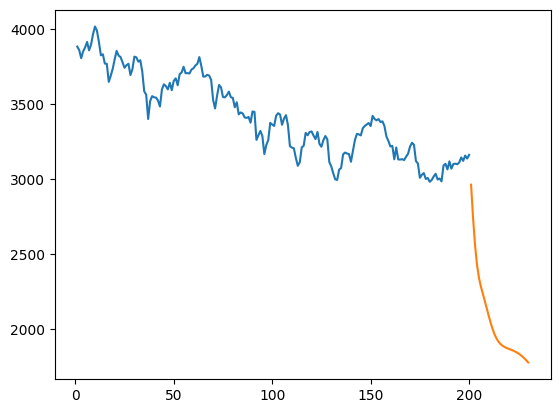

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[second_temp:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

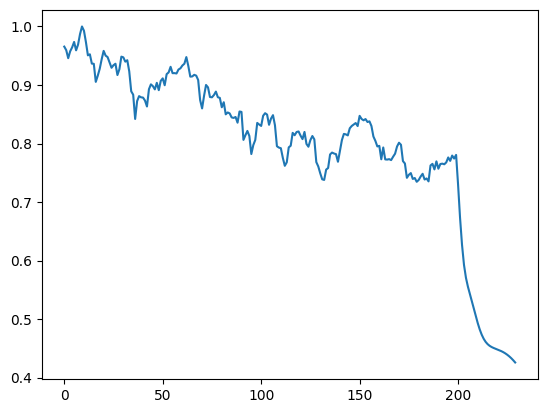

In [49]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[second_temp:])
plt.show()

In [50]:
df3=scaler.inverse_transform(df3).tolist()

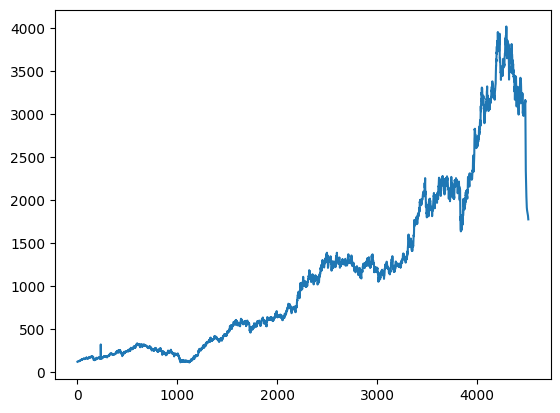

In [51]:
plt.plot(df3)
plt.show()